# Comprehensive Stock Portfolio Analysis

This notebook provides an extensive analysis of a stock portfolio, including performance, risk, asset allocation, correlation, and benchmark comparison. The analysis is visualized to make the information easily understandable.


## 1. Data Collection

In this section, we collect historical stock price data using `yfinance`.


In [18]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the portfolio
portfolio = {
    'AAPL': {'shares': 10, 'avg_price': 150},
    'MSFT': {'shares': 15, 'avg_price': 200},
    'GOOGL': {'shares': 8, 'avg_price': 1200}
}

# Fetch historical data
symbols = list(portfolio.keys())
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Display the first few rows of the data
data.head()


[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.960457,68.355545,154.215652
2020-01-03,72.251137,67.997955,152.295425
2020-01-06,72.826851,69.810379,152.689087
2020-01-07,72.484360,69.675537,151.296890
2020-01-08,73.650345,70.171463,153.706802


## 2. Portfolio Performance

### Cumulative Returns vs. Benchmark

We compare the cumulative returns of the portfolio and individual stocks against a market benchmark (S&P 500).


[*********************100%%**********************]  1 of 1 completed


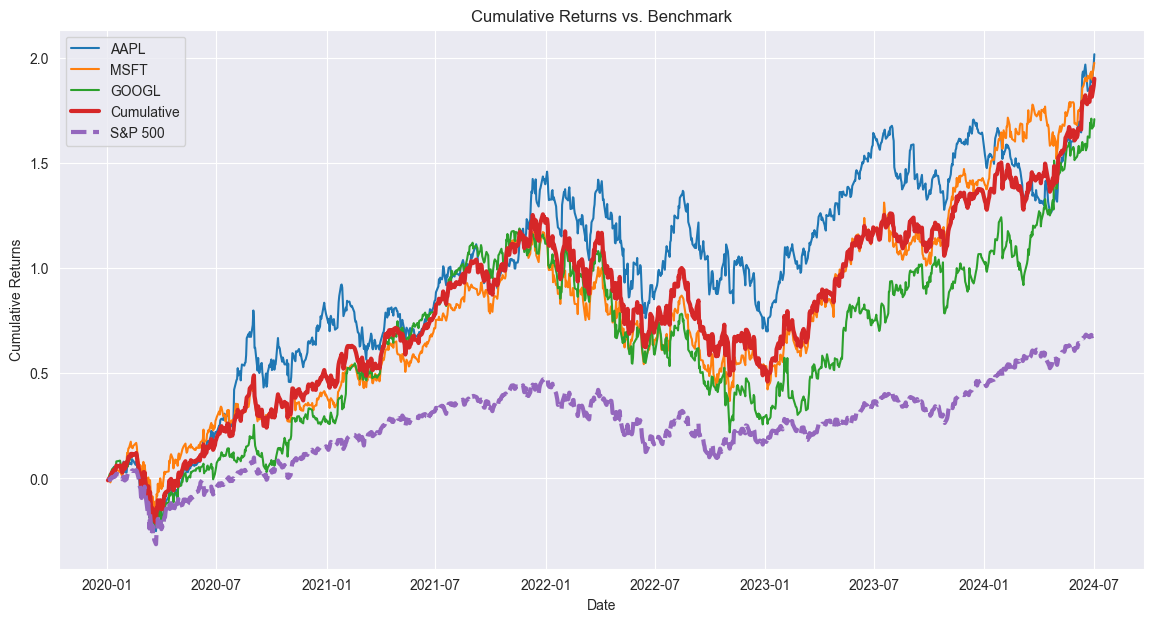

In [19]:
# Define benchmark
benchmark_symbol = '^GSPC'  # S&P 500

# Fetch benchmark data
benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate cumulative returns
returns = data.pct_change().dropna()
portfolio_returns = (returns + 1).cumprod() - 1
benchmark_returns = (benchmark_data.pct_change().dropna() + 1).cumprod() - 1
portfolio_cumulative_returns = portfolio_returns.mean(axis=1)
# Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for sym in symbols:
    plt.plot(portfolio_returns[sym], label=sym)

plt.plot(portfolio_cumulative_returns, label='Cumulative', linewidth=3 )
plt.plot(benchmark_returns, label='S&P 500', linewidth=3, linestyle='--')
plt.title('Cumulative Returns vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


## 3. Risk Analysis

### Daily Returns Distribution

We analyze the distribution of daily returns for the portfolio.


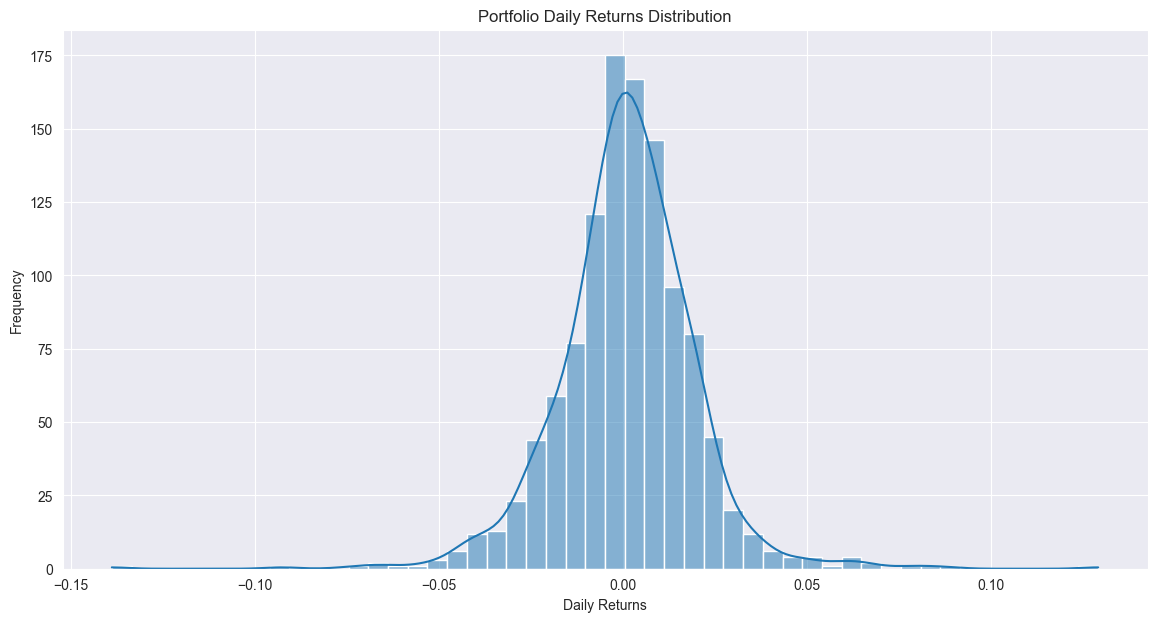

In [20]:
# Calculate daily returns for the portfolio
weights = [portfolio[sym]['shares'] * portfolio[sym]['avg_price'] for sym in symbols]
total_value = sum(weights)
weights = [w / total_value for w in weights]
portfolio_returns = returns.dot(weights)

# Plot daily returns distribution
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.histplot(portfolio_returns, bins=50, kde=True)
plt.title('Portfolio Daily Returns Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


### Risk-Return Scatter Plot

We plot the risk (standard deviation) versus return for the portfolio and individual stocks.


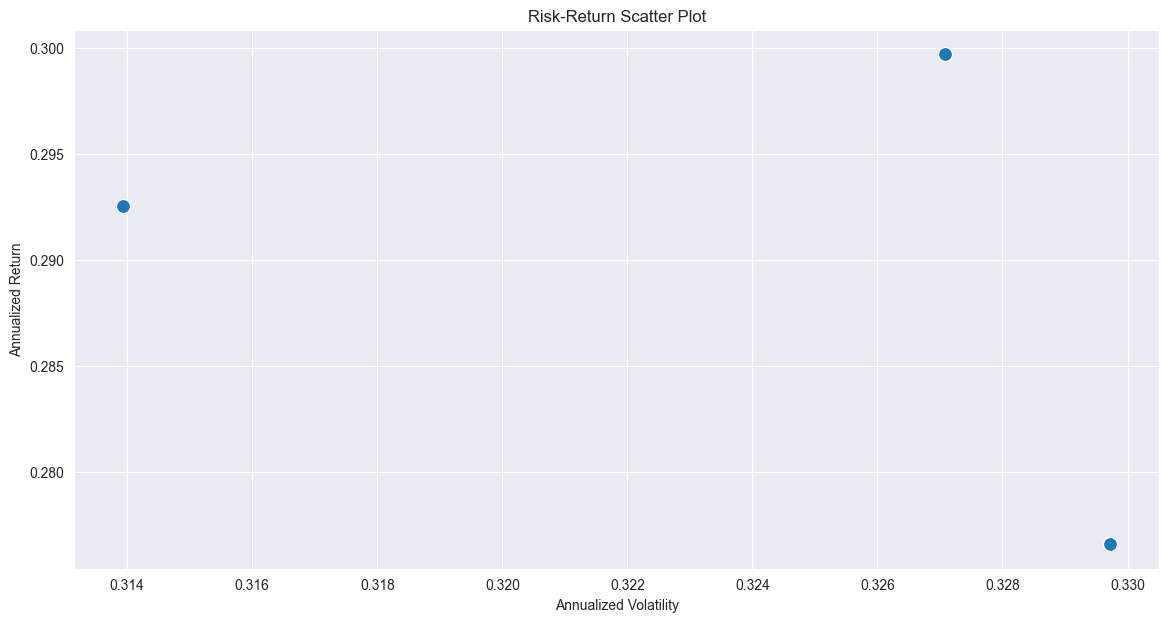

In [21]:
# Calculate annualized return and volatility
annualized_return = returns.mean() * 252
annualized_volatility = returns.std() * (252**0.5)

# Data for scatter plot
risk_return_data = pd.DataFrame({
    'Return': annualized_return,
    'Volatility': annualized_volatility
})

# Scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Volatility', y='Return', data=risk_return_data, s=100)
plt.title('Risk-Return Scatter Plot')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.show()


## 4. Asset Allocation

### Current Investment Allocation

We show the proportion of investment in each stock within the portfolio.


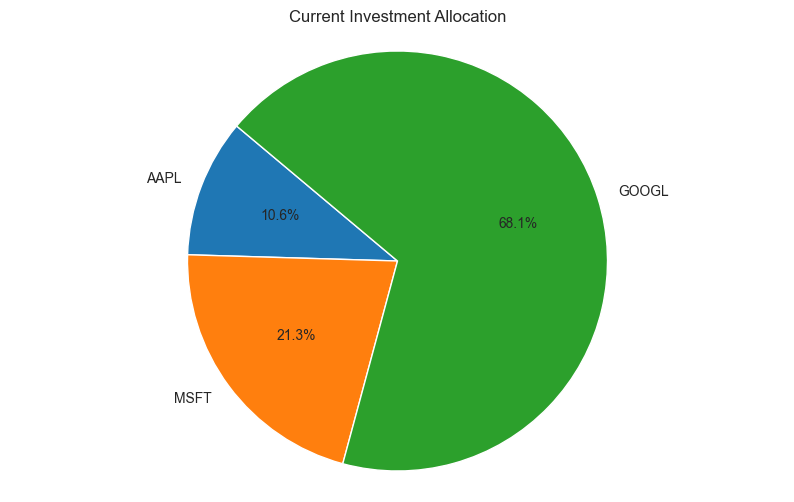

In [22]:
# Define portfolio
portfolio_values = {sym: portfolio[sym]['shares'] * portfolio[sym]['avg_price'] for sym in symbols}

# Pie chart of current investment
labels = portfolio_values.keys()
sizes = portfolio_values.values()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Current Investment Allocation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## 5. Correlation Analysis

We analyze the correlation between the returns of different stocks in the portfolio.


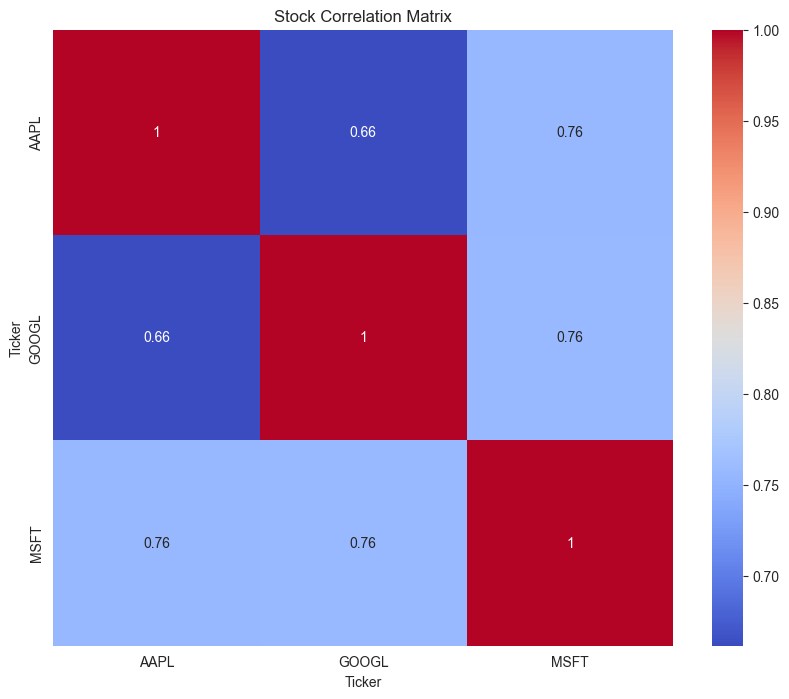

In [23]:
# Correlation matrix
correlation_matrix = returns.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Correlation Matrix')
plt.show()


## 6. Benchmark Comparison

### Relative Performance

We compare the portfolio's performance relative to a benchmark index.


In [24]:
# Plot relative performance
plt.figure(figsize=(14, 7))
for sym in symbols:
    plt.plot(portfolio_returns[sym] - benchmark_returns, label=f'{sym} vs. S&P 500')
plt.plot(portfolio_cumulative_returns - benchmark_returns, label='Portfolio vs. S&P 500', linewidth=3, linestyle='--')
plt.title('Relative Performance vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Relative Returns')
plt.legend()
plt.show()


KeyError: 'AAPL'

<Figure size 1400x700 with 0 Axes>

## 7. Advanced Risk Metrics

### Conditional Value at Risk (CVaR)

Assess the expected loss exceeding VaR, providing insights into tail risk.


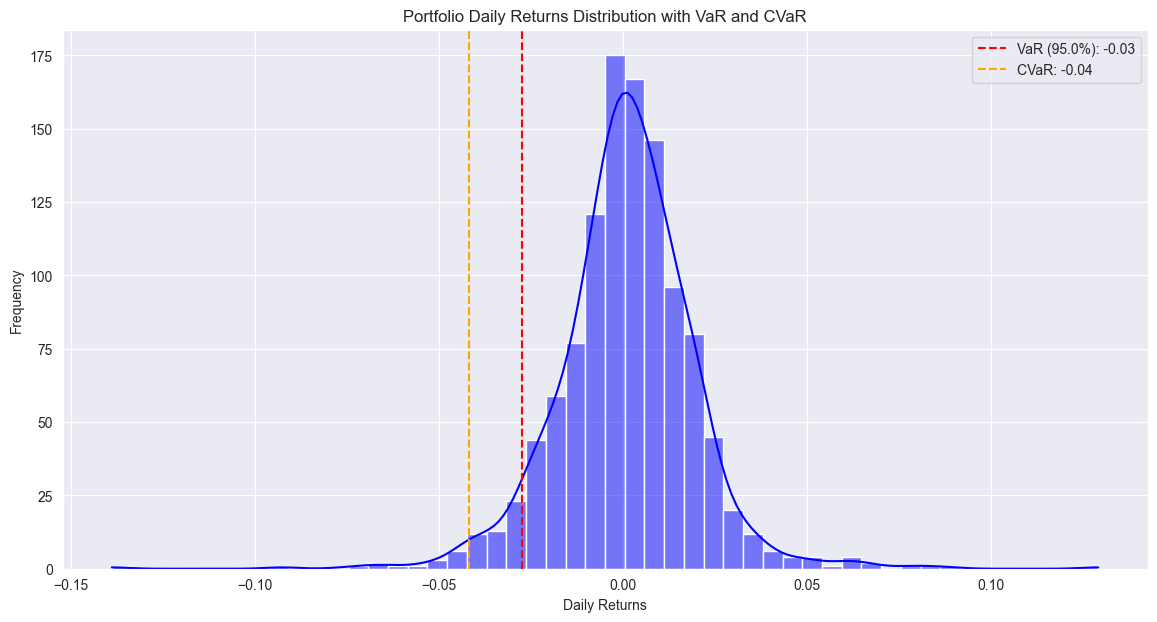

In [25]:
import numpy as np

# Calculate Value at Risk (VaR)
confidence_level = 0.95
VaR = np.percentile(portfolio_returns, 100 * (1 - confidence_level))

# Calculate Conditional Value at Risk (CVaR)
CVaR = portfolio_returns[portfolio_returns <= VaR].mean()

# Plot VaR and CVaR
plt.figure(figsize=(14, 7))
sns.histplot(portfolio_returns, bins=50, kde=True, color='blue')
plt.axvline(VaR, color='red', linestyle='--', label=f'VaR ({confidence_level*100}%): {VaR:.2f}')
plt.axvline(CVaR, color='orange', linestyle='--', label=f'CVaR: {CVaR:.2f}')
plt.title('Portfolio Daily Returns Distribution with VaR and CVaR')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Rolling Beta

Analyze the portfolio's beta changes over time to assess changing sensitivity to the market.


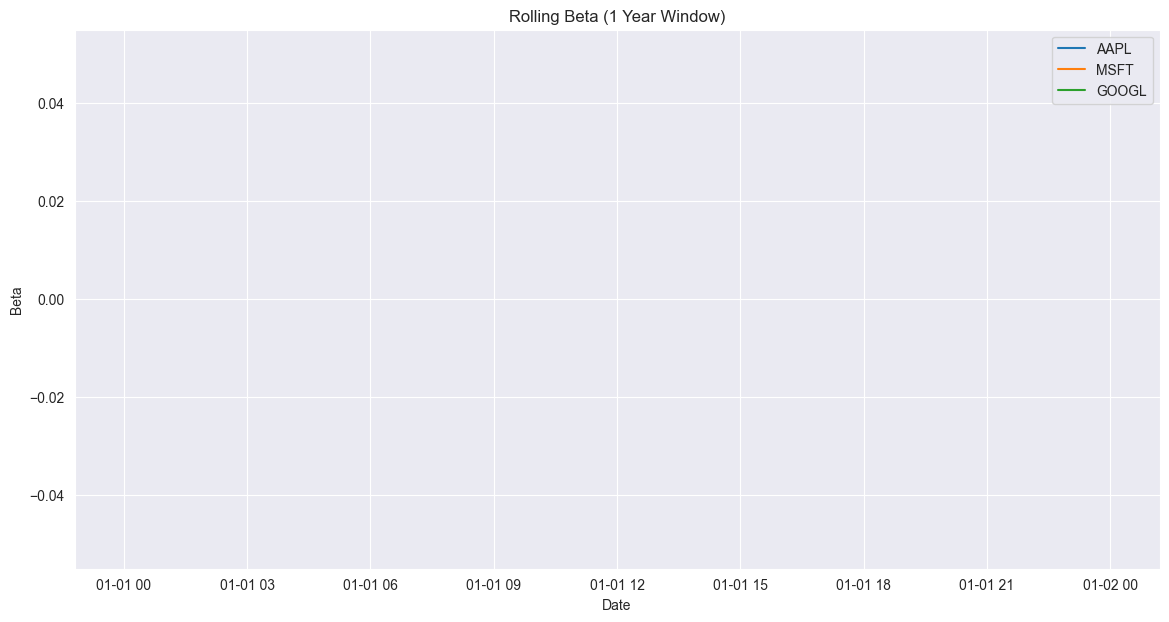

In [26]:
window_size = 252  # 1 year of trading days

# Calculate rolling beta
rolling_beta = returns.rolling(window=window_size).cov(benchmark_returns) / benchmark_returns.rolling(window=window_size).var()

# Plot rolling beta
plt.figure(figsize=(14, 7))
for sym in symbols:
    plt.plot(rolling_beta[sym], label=sym)
plt.title('Rolling Beta (1 Year Window)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.show()


## 8. Monte Carlo Simulation

Simulate the future value of the portfolio under different scenarios to understand the range of potential outcomes.


In [27]:
num_simulations = 1000
num_days = 252  # 1 year of trading days

# Simulate portfolio returns
simulated_returns = np.random.normal(returns.mean(), returns.std(), (num_days, num_simulations))

# Calculate cumulative returns for each simulation
simulated_cumulative_returns = (simulated_returns + 1).cumprod(axis=0)

# Plot simulations
plt.figure(figsize=(14, 7))
plt.plot(simulated_cumulative_returns, color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (252, 1000) and arg 1 with shape (3,).

## 9. Drawdown Analysis

### Maximum Drawdown

Measure the largest peak-to-trough decline to understand the risk of significant losses.


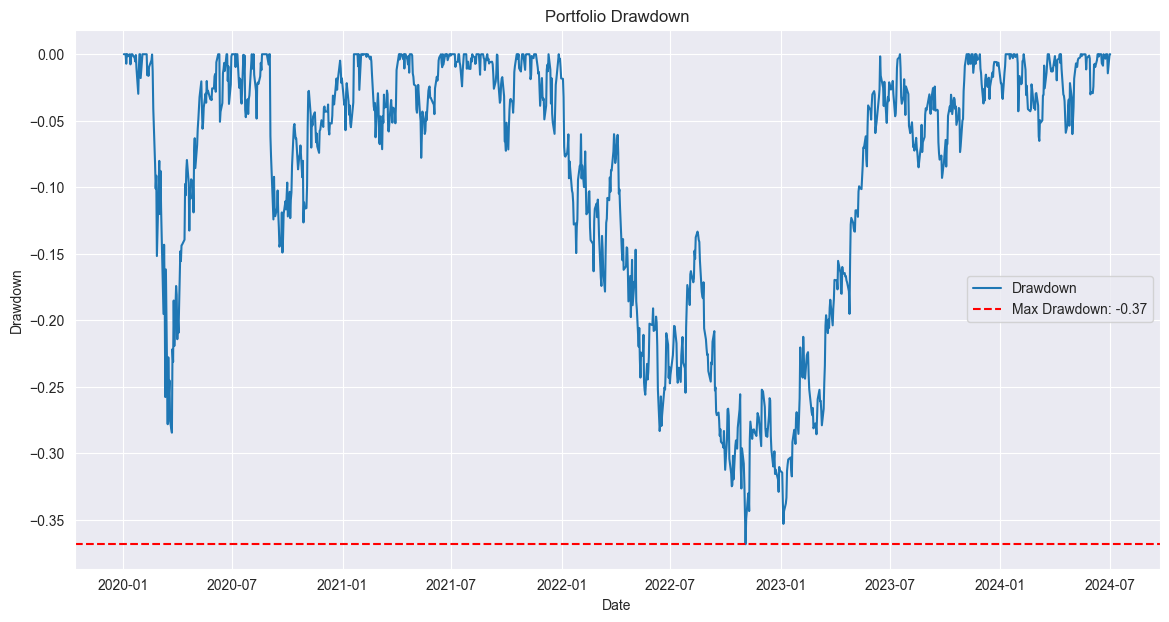

In [28]:
# Calculate drawdowns
cumulative_returns = (portfolio_returns + 1).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max

# Calculate maximum drawdown
max_drawdown = drawdown.min()

# Plot drawdowns
plt.figure(figsize=(14, 7))
plt.plot(drawdown, label='Drawdown')
plt.axhline(max_drawdown, color='red', linestyle='--', label=f'Max Drawdown: {max_drawdown:.2f}')
plt.title('Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


# Comprehensive Stock Portfolio Analysis

This notebook provides an extensive analysis of a stock portfolio, including performance, risk, asset allocation, correlation, and benchmark comparison. The analysis is visualized to make the information easily understandable.

## 1. Data Collection

In this section, we collect historical stock price data using `yfinance`.


In [30]:
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define the portfolio
portfolio = {
    'AAPL': {'shares': 10, 'avg_price': 150},
    'MSFT': {'shares': 15, 'avg_price': 200},
    'GOOGL': {'shares': 8, 'avg_price': 1200}
}

# Fetch historical data
symbols = list(portfolio.keys())
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Display the first few rows of the data
data.head()


[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.960457,68.355545,154.215652
2020-01-03,72.251137,67.997955,152.295425
2020-01-06,72.826851,69.810379,152.689087
2020-01-07,72.484360,69.675537,151.296890
2020-01-08,73.650345,70.171463,153.706802


## 2. Portfolio Performance

### Cumulative Returns vs. Benchmark

We compare the cumulative returns of the portfolio and individual stocks against a market benchmark (S&P 500).


[*********************100%%**********************]  1 of 1 completed


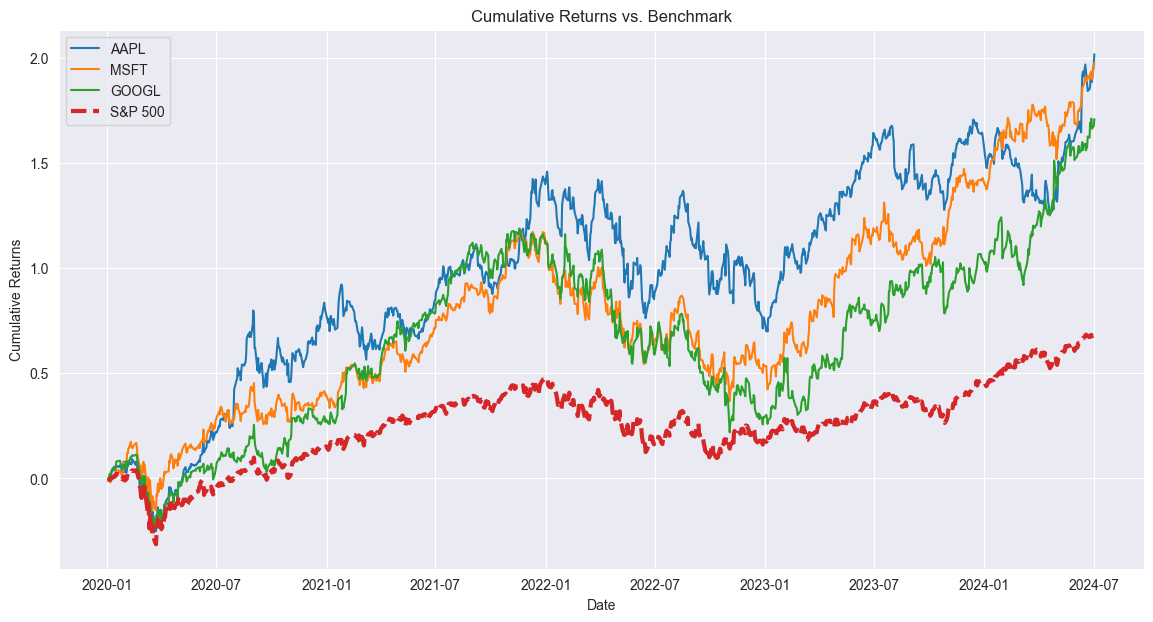

In [31]:
# Define benchmark
benchmark_symbol = '^GSPC'  # S&P 500

# Fetch benchmark data
benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate cumulative returns
returns = data.pct_change().dropna()
benchmark_returns = benchmark_data.pct_change().dropna()

# Align returns with benchmark
returns = returns.loc[benchmark_returns.index]

portfolio_returns = (returns + 1).cumprod() - 1
benchmark_cumulative_returns = (benchmark_returns + 1).cumprod() - 1

# Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for sym in symbols:
    plt.plot(portfolio_returns[sym], label=sym)
plt.plot(benchmark_cumulative_returns, label='S&P 500', linewidth=3, linestyle='--')
plt.title('Cumulative Returns vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


## 3. Risk Analysis

### Daily Returns Distribution

We analyze the distribution of daily returns for the portfolio.


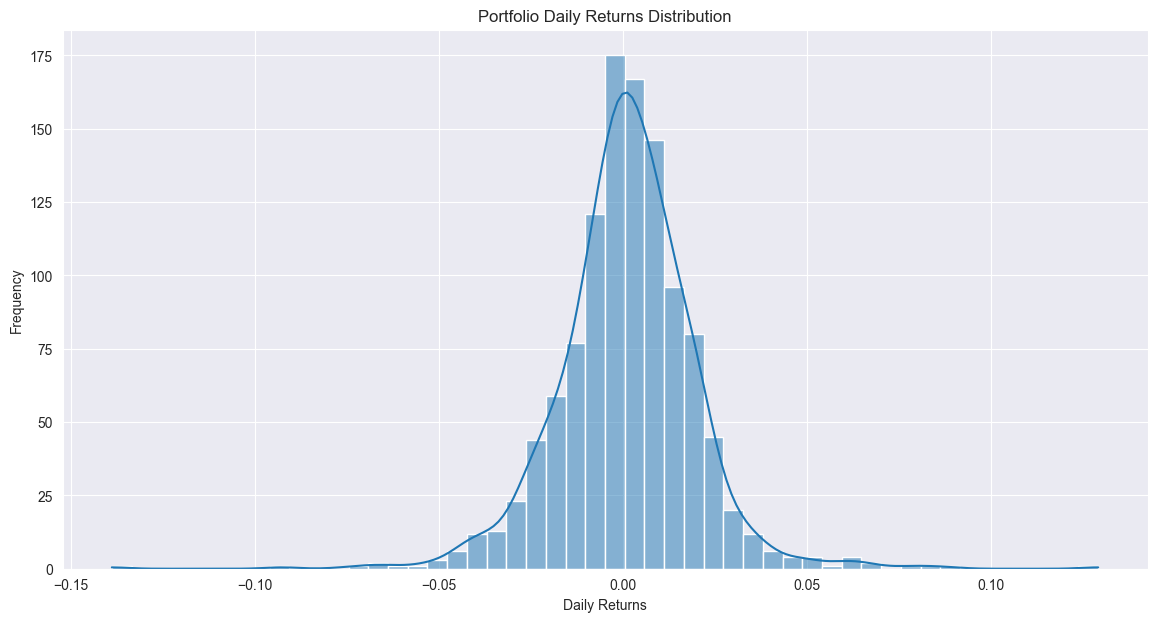

In [32]:
# Calculate daily returns for the portfolio
weights = [portfolio[sym]['shares'] * portfolio[sym]['avg_price'] for sym in symbols]
total_value = sum(weights)
weights = [w / total_value for w in weights]
portfolio_returns = returns.dot(weights)

# Plot daily returns distribution
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.histplot(portfolio_returns, bins=50, kde=True)
plt.title('Portfolio Daily Returns Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


### Rolling Beta

Analyze the portfolio's beta changes over time to assess changing sensitivity to the market.


[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  1 of 1 completed


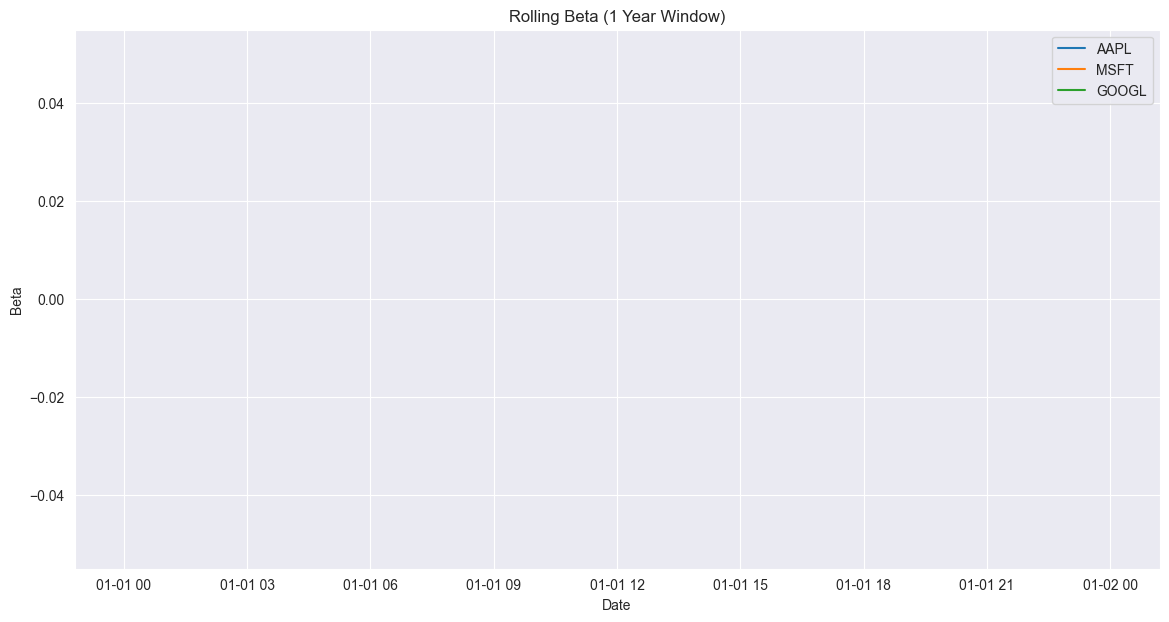

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Re-fetch data to ensure proper alignment
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
benchmark_returns = benchmark_data.pct_change().dropna()

# Ensure proper alignment
returns = returns.loc[benchmark_returns.index]

# Calculate rolling beta
window_size = 252  # 1 year of trading days
rolling_beta = returns.rolling(window=window_size).cov(benchmark_returns) / benchmark_returns.rolling(window=window_size).var()

# Plot rolling beta
plt.figure(figsize=(14, 7))
for sym in symbols:
    plt.plot(rolling_beta[sym], label=sym)
plt.title('Rolling Beta (1 Year Window)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.show()


## 4. Asset Allocation

### Current Investment Allocation

We show the proportion of investment in each stock within the portfolio.


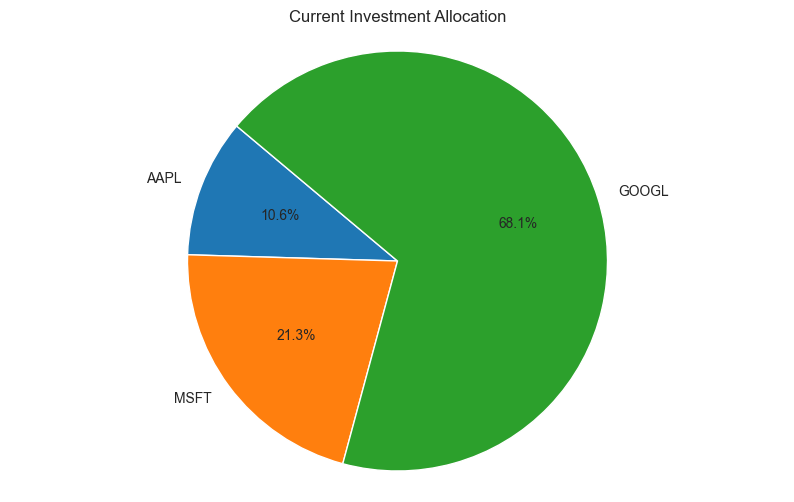

In [34]:
# Define portfolio
portfolio_values = {sym: portfolio[sym]['shares'] * portfolio[sym]['avg_price'] for sym in symbols}

# Pie chart of current investment
labels = portfolio_values.keys()
sizes = portfolio_values.values()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Current Investment Allocation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## 5. Correlation Analysis

We analyze the correlation between the returns of different stocks in the portfolio.


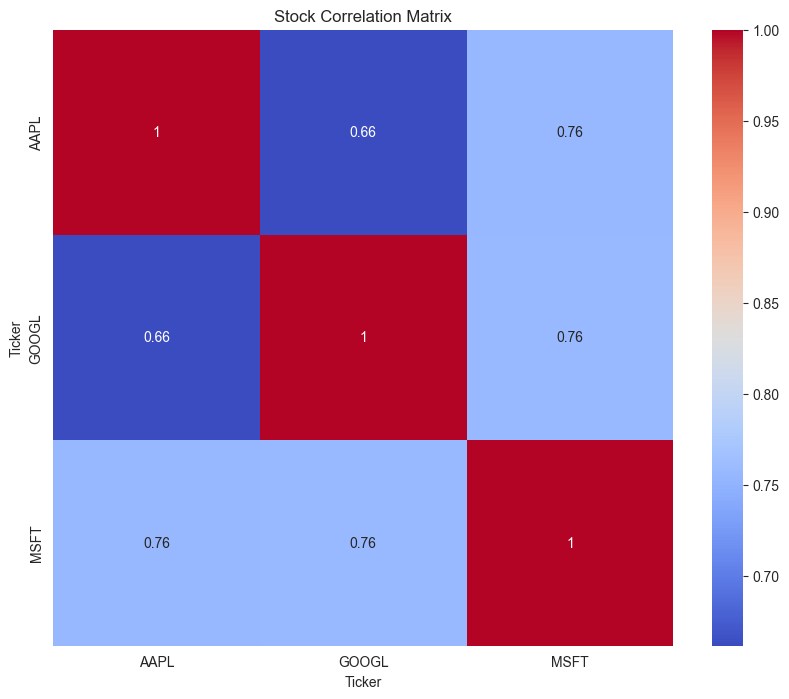

In [35]:
# Correlation matrix
correlation_matrix = returns.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Correlation Matrix')
plt.show()


## 6. Benchmark Comparison

### Relative Performance

We compare the portfolio's performance relative to a benchmark index.


In [36]:
# Plot relative performance
plt.figure(figsize=(14, 7))
for sym in symbols:
    plt.plot(portfolio_returns[sym] - benchmark_cumulative_returns, label=f'{sym} vs. S&P 500')
plt.plot(portfolio_returns.dot(weights) - benchmark_cumulative_returns, label='Portfolio vs. S&P 500', linewidth=3, linestyle='--')
plt.title('Relative Performance vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Relative Returns')
plt.legend()
plt.show()


KeyError: 'AAPL'

<Figure size 1400x700 with 0 Axes>

## 7. Advanced Risk Metrics

### Conditional Value at Risk (CVaR)

Assess the expected loss exceeding VaR, providing insights into tail risk.


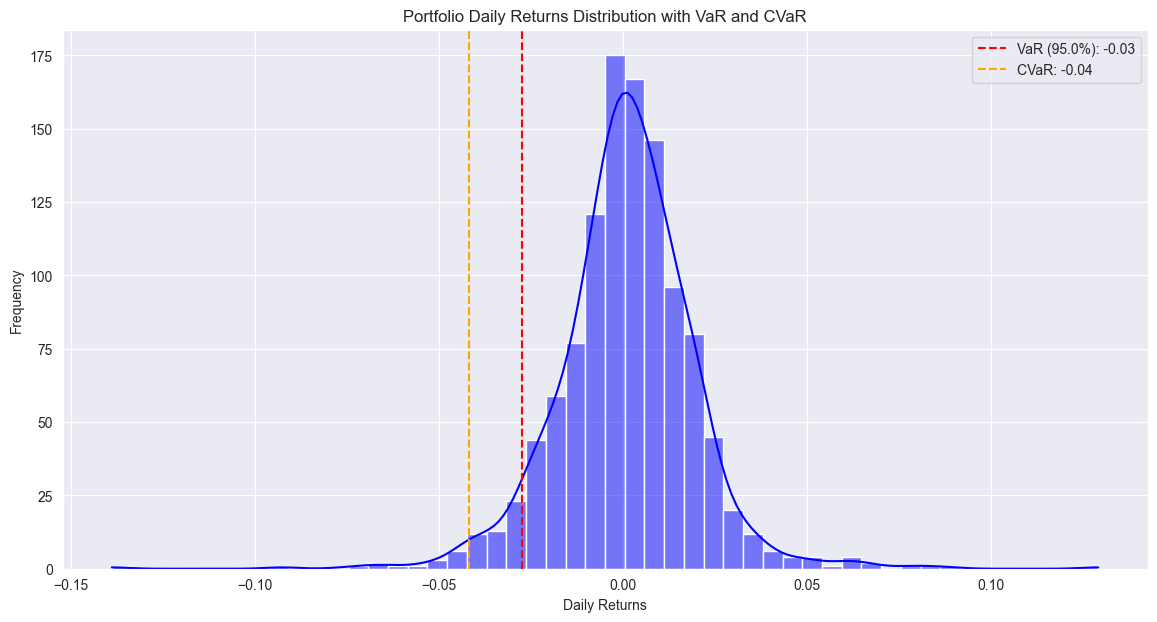

In [37]:
import numpy as np

# Calculate Value at Risk (VaR)
confidence_level = 0.95
VaR = np.percentile(portfolio_returns, 100 * (1 - confidence_level))

# Calculate Conditional Value at Risk (CVaR)
CVaR = portfolio_returns[portfolio_returns <= VaR].mean()

# Plot VaR and CVaR
plt.figure(figsize=(14, 7))
sns.histplot(portfolio_returns, bins=50, kde=True, color='blue')
plt.axvline(VaR, color='red', linestyle='--', label=f'VaR ({confidence_level*100}%): {VaR:.2f}')
plt.axvline(CVaR, color='orange', linestyle='--', label=f'CVaR: {CVaR:.2f}')
plt.title('Portfolio Daily Returns Distribution with VaR and CVaR')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 8. Monte Carlo Simulation

Simulate the future value of the portfolio under different scenarios to understand the range of potential outcomes.


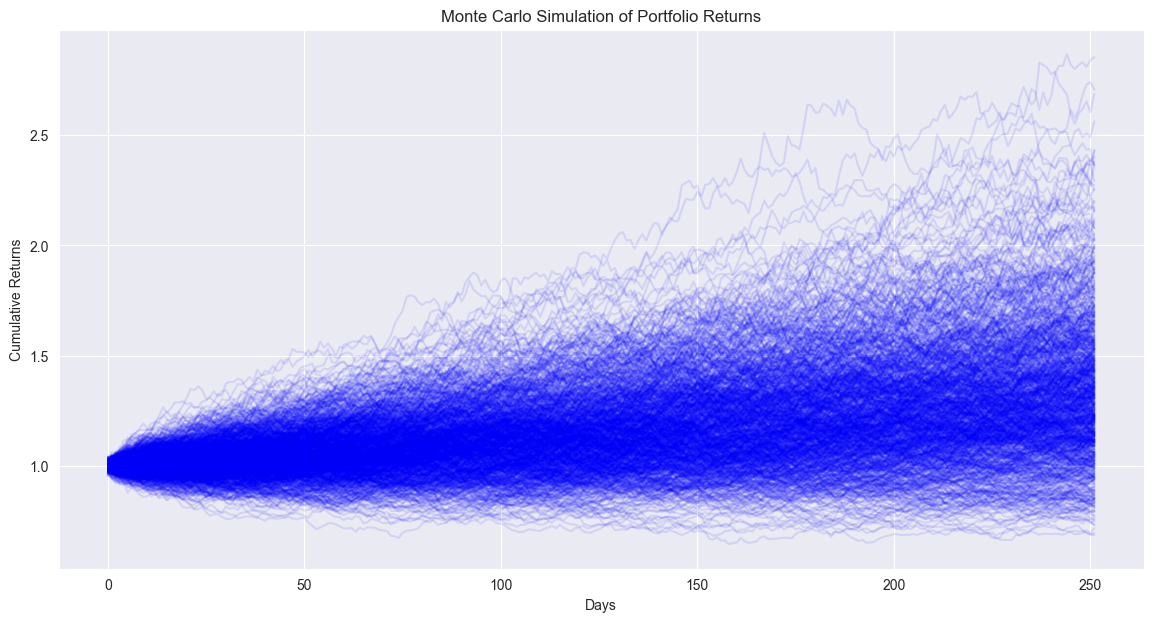

In [39]:
num_simulations = 1000
num_days = 252  # 1 year of trading days

# Simulate portfolio returns
simulated_returns = np.random.normal(returns.mean().values, returns.std().values, (num_days, num_simulations, len(symbols)))

# Calculate cumulative returns for each simulation
simulated_cumulative_returns = np.cumprod(simulated_returns + 1, axis=0)

# Calculate portfolio cumulative returns
portfolio_simulated_cumulative_returns = np.dot(simulated_cumulative_returns, np.array(weights))

# Plot simulations
plt.figure(figsize=(14, 7))
for i in range(num_simulations):
    plt.plot(portfolio_simulated_cumulative_returns[:, i], color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.show()


## 9. Drawdown Analysis

### Maximum Drawdown

Measure the largest peak-to-trough decline to understand the risk of significant losses.


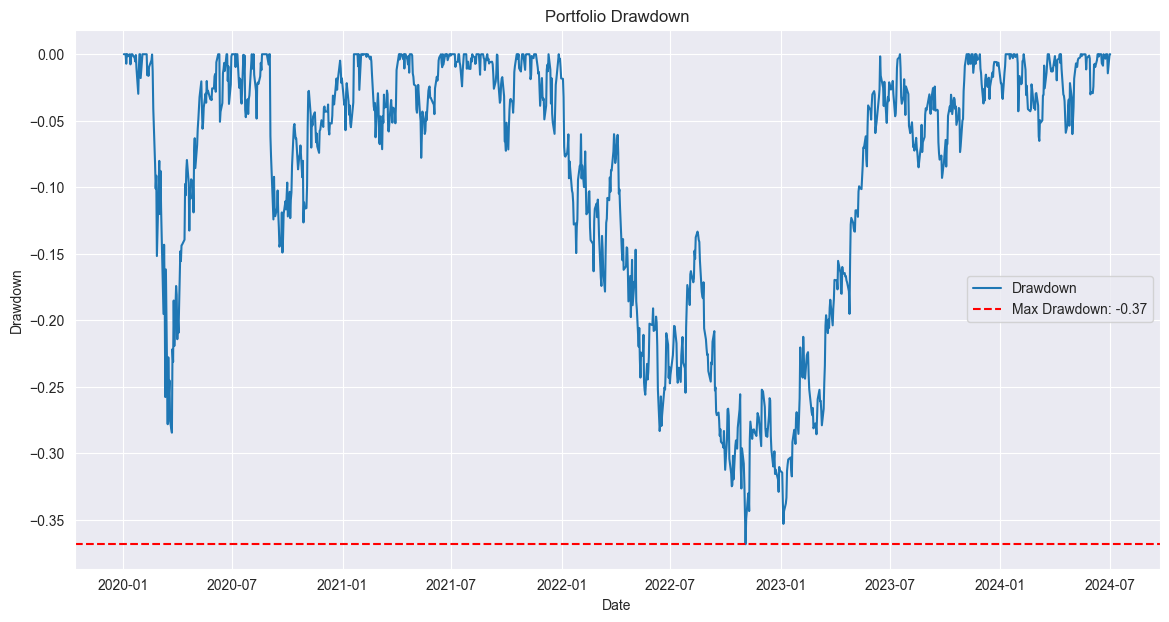

In [40]:
# Calculate drawdowns
cumulative_returns = (portfolio_returns + 1).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max

# Calculate maximum drawdown
max_drawdown = drawdown.min()

# Plot drawdowns
plt.figure(figsize=(14, 7))
plt.plot(drawdown, label='Drawdown')
plt.axhline(max_drawdown, color='red', linestyle='--', label=f'Max Drawdown: {max_drawdown:.2f}')
plt.title('Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()
